Topic:        Challenge Set 8 <br />
Subject:      Classification Error Metrics<br />
Date:         05/07/2018 <br />
Name:         Ben Sturm <br />

### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

I'm going to start this challenge by loading in the votes dataframe that was pickled in the previous challenge set.

In [3]:
import pandas as pd
import numpy as np

In [4]:
votes3 = pd.read_pickle('votes3.pkl')

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [7]:
votes3.head()

,party,vote1,vote2,vote3,vote4,vote5,vote6,vote7,vote8,vote9,vote10,vote11,vote12,vote13,vote14,vote15,vote16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [8]:
y = votes3['party']
X = votes3.drop('party',axis=1)

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=.30, random_state=4444)

In [20]:
knn = KNeighborsClassifier(n_neighbors=6).fit(Xtrain,ytrain)
y_predict = knn.predict(Xtest)
print("KNN test data accuracy score: {:.3f}".format(accuracy_score(ytest,y_predict)))

KNN test data accuracy score: 0.931


In [21]:
print("KNN summary report")
print(classification_report(ytest,y_predict))

KNN summary report
             precision    recall  f1-score   support

   democrat       0.93      0.96      0.94        77
 republican       0.94      0.89      0.91        54

avg / total       0.93      0.93      0.93       131



In [19]:
logreg = LogisticRegression(C=1).fit(Xtrain,ytrain)
ytest_pred = logreg.predict(Xtest)
print("Logistic test data accuracy score: {:.3f}".format(accuracy_score(ytest,ytest_pred)))

Logistic test data accuracy score: 0.939


In [22]:
print("Logistic regression summary report")
print(classification_report(ytest,ytest_pred))

Logistic regression summary report
             precision    recall  f1-score   support

   democrat       0.93      0.97      0.95        77
 republican       0.96      0.89      0.92        54

avg / total       0.94      0.94      0.94       131



In [27]:
gnb = GaussianNB().fit(Xtrain,ytrain)
gnb_score = gnb.score(Xtest,ytest)
ytest_pred = gnb.predict(Xtest)
print('Gaussian Naive Bayes test accuracy {:.3f}'.format(gnb_score))

Gaussian Naive Bayes test accuracy 0.939


In [28]:
print("Gaussian Naive Bayes summary report")
print(classification_report(ytest,ytest_pred))

Gaussian Naive Bayes summary report
             precision    recall  f1-score   support

   democrat       0.92      0.99      0.95        77
 republican       0.98      0.87      0.92        54

avg / total       0.94      0.94      0.94       131



In [29]:
svm = SVC().fit(Xtrain,ytrain)
svm_score = svm.score(Xtest,ytest)
print('SVM Classifier test accuracy: {:.3f}'.format(svm_score))

SVM Classifier test accuracy: 0.954


In [30]:
ytest_pred = svm.predict(Xtest)
print("SVM summary report")
print(classification_report(ytest,ytest_pred))

SVM summary report
             precision    recall  f1-score   support

   democrat       0.95      0.97      0.96        77
 republican       0.96      0.93      0.94        54

avg / total       0.95      0.95      0.95       131



In [31]:
tree = DecisionTreeClassifier().fit(Xtrain,ytrain)
tree_score = tree.score(Xtest,ytest)
print('Decision Tree test accuracy: {:.3f}'.format(tree_score))

Decision Tree test accuracy: 0.954


In [33]:
ytest_pred = tree.predict(Xtest)
print("Decision Tree summary report")
print(classification_report(ytest,ytest_pred))

Decision Tree summary report
             precision    recall  f1-score   support

   democrat       0.95      0.97      0.96        77
 republican       0.96      0.93      0.94        54

avg / total       0.95      0.95      0.95       131



In [34]:
forest = RandomForestClassifier().fit(Xtrain,ytrain)
forest_score = forest.score(Xtest,ytest)
print('Random Forest test accuracy: {:.3f}'.format(forest_score))

Random Forest test accuracy: 0.947


In [35]:
ytest_pred = forest.predict(Xtest)
print("Random Forest test accuracy")
print(classification_report(ytest,ytest_pred))

Random Forest test accuracy
             precision    recall  f1-score   support

   democrat       0.94      0.97      0.96        77
 republican       0.96      0.91      0.93        54

avg / total       0.95      0.95      0.95       131



### Challenge 2

For each, draw the ROC curve and calculate the AUC.

In [180]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [181]:
import matplotlib.pyplot as plt

%matplotlib inline

In [182]:
def replace_ys(y):
    # function to replace target variables with 1s and 0s for democrat and republican
    y2 = y.replace('democrat',1)
    y2 = y2.replace('republican',0)
    return y2

In [183]:
ytrain2 = replace_ys(ytrain)
ytest2 = replace_ys(ytest)

In [184]:
logreg = LogisticRegression(C=1).fit(Xtrain,ytrain2)

In [185]:
logreg.predict_proba(Xtest)
logreg_auc = roc_auc_score(ytest2,logreg.predict_proba(Xtest)[:,1])

In [186]:
logreg_auc

0.6475225225225225

In [187]:
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(ytest2,logreg.predict_proba(Xtest)[:,1])

In [188]:
knn = KNeighborsClassifier(n_neighbors=6).fit(Xtrain,ytrain2)
knn.predict_proba(Xtest)
knn_auc = roc_auc_score(ytest2,knn.predict_proba(Xtest)[:,1])
knn_auc

0.6756756756756757

In [189]:
fpr_knn, tpr_knn, threshold_knn = roc_curve(ytest2, knn.predict_proba(Xtest)[:,1])

In [190]:
gnb = GaussianNB().fit(Xtrain,ytrain2)
gnb_auc = roc_auc_score(ytest2,gnb.predict_proba(Xtest)[:,1])
fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(ytest2, gnb.predict_proba(Xtest)[:,1])

In [191]:
svm = SVC().fit(Xtrain,ytrain2)
#svm.decision_function(Xtest)
svm_auc = roc_auc_score(ytest2,svm.decision_function(Xtest))
fpr_svm, tpr_svm, threshold_svm = roc_curve(ytest2,svm.decision_function(Xtest))

In [192]:
tree = DecisionTreeClassifier().fit(Xtrain,ytrain2)
tree_auc = roc_auc_score(ytest2,tree.predict_proba(Xtest)[:,1])
fpr_tree, tpr_tree, threshold_tree = roc_curve(ytest2,tree.predict_proba(Xtest)[:,1])

In [193]:
forest = RandomForestClassifier().fit(Xtrain,ytrain2)
forest_auc = roc_auc_score(ytest2,forest.predict_proba(Xtest)[:,1])
fpr_forest, tpr_forest, threshold_forest = roc_curve(ytest2,forest.predict_proba(Xtest)[:,1])

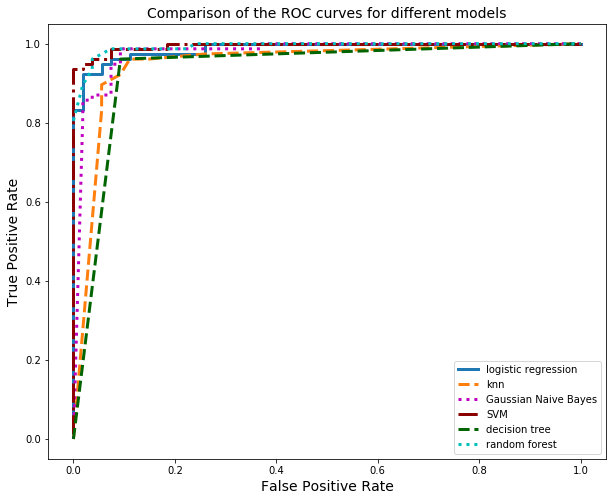

In [100]:
fig, ax = plt.subplots(figsize=(10,8))
lw=3
ax.plot(fpr_logreg,tpr_logreg,'-',label='logistic regression',linewidth=lw)
ax.plot(fpr_knn,tpr_knn,'--',label='knn',linewidth=lw)
ax.plot(fpr_gnb,tpr_gnb,':',color='m',label='Gaussian Naive Bayes',linewidth=lw)
ax.plot(fpr_svm,tpr_svm,'-.',color='darkred', label='SVM',linewidth=lw)
ax.plot(fpr_tree,tpr_tree,'--',color='darkgreen',label='decision tree',linewidth=lw)
ax.plot(fpr_forest,tpr_forest,':',color='c',label='random forest',linewidth=lw)
ax.set_xlabel('False Positive Rate',fontsize=14)
ax.set_ylabel('True Positive Rate',fontsize=14)
ax.set_title('Comparison of the ROC curves for different models',fontsize=14)
ax.legend()

In [103]:
print("The logistic regression AUC is: {:.3f}".format(logreg_auc))
print("The KNN AUC is: {:.3f}".format(knn_auc))
print("The Gaussian Naive Bayes AUC is: {:.3f}".format(gnb_auc))
print("The SVM AUC is: {:.3f}".format(svm_auc))
print("The decision tree AUC is: {:.3f}".format(tree_auc))
print("The random forest AUC is: {:.3f}".format(forest_auc))

The logistic regression AUC is: 0.988
The KNN AUC is: 0.948
The Gaussian Naive Bayes AUC is: 0.977
The SVM AUC is: 0.995
The decision tree AUC is: 0.934
The random forest AUC is: 0.993


### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [106]:
from sklearn.model_selection import cross_val_score

In [111]:
logreg_cv = cross_val_score(LogisticRegression(C=1),Xtrain,ytrain2)

In [114]:
knn_cv = cross_val_score(KNeighborsClassifier(n_neighbors=6),Xtrain,ytrain2)

In [116]:
gnb_cv = cross_val_score(GaussianNB(),Xtrain,ytrain2)

In [118]:
svm_cv = cross_val_score(SVC(),Xtrain,ytrain2)

In [121]:
tree_cv = cross_val_score(DecisionTreeClassifier(),Xtrain,ytrain2)

In [124]:
forest_cv = cross_val_score(RandomForestClassifier(),Xtrain,ytrain2)

In [126]:
print("Logistic Regression average cross-validation accuracy: {:.3f}".format(np.mean(logreg_cv)))
print("K nearest neighbors average cross-validation accuracy: {:.3f}".format(np.mean(knn_cv)))
print("Gaussian Naive Bayes average cross-validation accuracy: {:.3f}".format(np.mean(gnb_cv)))
print("Support Vector Classifier average cross-validation accuracy: {:.3f}".format(np.mean(svm_cv)))
print("Decision tree average cross-validation accuracy: {:.3f}".format(np.mean(tree_cv)))
print("Random forest cross-validation accuracy: {:.3f}".format(np.mean(forest_cv)))

Logistic Regression average cross-validation accuracy: 0.967
K nearest neighbors average cross-validation accuracy: 0.941
Gaussian Naive Bayes average cross-validation accuracy: 0.928
Support Vector Classifier average cross-validation accuracy: 0.964
Decision tree average cross-validation accuracy: 0.951
Random forest cross-validation accuracy: 0.957


### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [127]:
movies2 = pd.read_pickle('movies2.pkl')

In [128]:
y = movies2['Rating']
X = movies2[['Budget','DomesticTotalGross','Runtime','ReleaseMonth']]

In [129]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.3,random_state=4444)

In [154]:
logreg_m = LogisticRegression(C=1).fit(Xtrain,ytrain)
y_pred1 = logreg_m.predict(Xtest)

In [155]:
print("Logistic Regression classification report for movie data")
print(classification_report(ytest,y_pred1))

Logistic Regression classification report for movie data
             precision    recall  f1-score   support

         PG       0.00      0.00      0.00         6
      PG-13       0.48      0.92      0.63        12
          R       0.50      0.22      0.31         9

avg / total       0.38      0.48      0.38        27



/Users/bwsturm/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [156]:
knn_m = KNeighborsClassifier(n_neighbors=5).fit(Xtrain,ytrain)
y_pred2 = knn_m.predict(Xtest)

In [157]:
print("K Nearest Neighbors classification report for movie data")
print(classification_report(ytest,y_pred2))

K Nearest Neighbors classification report for movie data
             precision    recall  f1-score   support

         PG       0.50      0.17      0.25         6
      PG-13       0.47      0.58      0.52        12
          R       0.40      0.44      0.42         9

avg / total       0.45      0.44      0.43        27



### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [158]:
cancer = pd.read_pickle('cancer.pkl')

In [166]:
y = cancer['outcome']
X = cancer.drop('outcome',axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.30, random_state=4444)

In [170]:
ytrain = ytrain.replace(2,0)
ytest = ytest.replace(2,0)
ytest.value_counts()

1    74
0    18
Name: outcome, dtype: int64

In [173]:
logreg = LogisticRegression(C=1).fit(Xtrain,ytrain)
logreg.predict_proba(Xtest)
logreg_auc = roc_auc_score(ytest,logreg.predict_proba(Xtest)[:,1])

In [174]:
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(ytest,logreg.predict_proba(Xtest)[:,1])

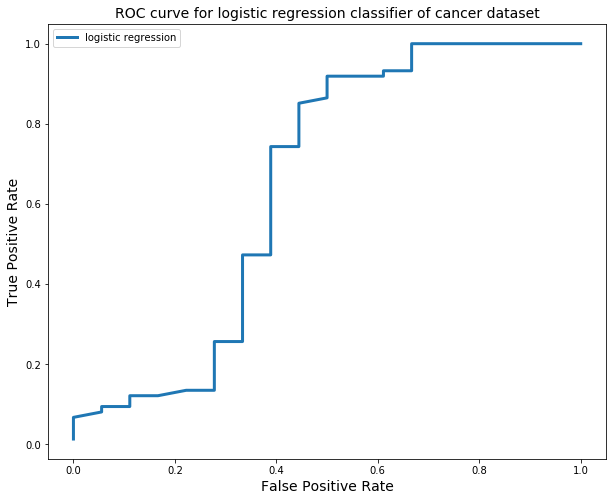

In [176]:
fig, ax = plt.subplots(figsize=(10,8))
lw=3
ax.plot(fpr_logreg,tpr_logreg,'-',label='logistic regression',linewidth=lw)
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)
ax.set_title('ROC curve for logistic regression classifier of cancer dataset', fontsize=14)
ax.legend()

In [177]:
print("The logistic regression AUC is: {:.3f}".format(logreg_auc))

The logistic regression AUC is: 0.648


In [194]:
logreg.predict_proba(Xtest)

array([[0.28522137, 0.71477863],
       [0.20472187, 0.79527813],
       [0.23092165, 0.76907835],
       [0.22461738, 0.77538262],
       [0.22982224, 0.77017776],
       [0.1947697 , 0.8052303 ],
       [0.22720051, 0.77279949],
       [0.18628371, 0.81371629],
       [0.19136073, 0.80863927],
       [0.29982626, 0.70017374],
       [0.2617701 , 0.7382299 ],
       [0.28694532, 0.71305468],
       [0.1975649 , 0.8024351 ],
       [0.58627849, 0.41372151],
       [0.23195515, 0.76804485],
       [0.30714902, 0.69285098],
       [0.18318847, 0.81681153],
       [0.1947697 , 0.8052303 ],
       [0.25151401, 0.74848599],
       [0.29040569, 0.70959431],
       [0.18756658, 0.81243342],
       [0.25072032, 0.74927968],
       [0.23473722, 0.76526278],
       [0.33199728, 0.66800272],
       [0.23157942, 0.76842058],
       [0.25085469, 0.74914531],
       [0.34227753, 0.65772247],
       [0.27281383, 0.72718617],
       [0.2243519 , 0.7756481 ],
       [0.21610632, 0.78389368],
       [0.